In [2]:
import pandas as pd
import numpy as np
import csv
import scipy
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 

import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

df = pd.read_csv('data.csv', sep=',')#.drop('millis_time',axis =1)

In [161]:
df[df.id == 1]

,accX,accY,accZ,gyroX,gyroY,gyroZ,millis_time,id
0,7.206665,-3.483700,-5.981627,0.70875,-14.57750,-27.641251,656766,1
1,7.206665,-3.483700,-5.981627,0.70875,-14.57750,-27.212500,656773,1
2,6.240034,-3.655971,-5.550951,0.34125,-14.64750,-27.212500,656780,1
3,6.240034,-3.655971,-5.550951,0.21875,-13.25625,-25.392500,656787,1
4,6.240034,-3.655971,-5.550951,2.12625,-11.79500,-23.625000,656795,1
...,...,...,...,...,...,...,...,...
6495,7.847896,5.512668,-0.765648,-2.25750,13.08125,-31.876249,704903,1
6496,7.847896,5.512668,-0.765648,-2.17875,13.08125,-31.876249,704911,1
6497,7.742619,5.876351,-0.775219,-2.28375,13.33500,-31.806250,704918,1
6498,7.742619,5.876351,-0.775219,-1.44375,12.87125,-32.401249,704925,1


In [3]:
def diff(x,y):
    h = x[1]-x[0]
    y0 = (-3*y[0]+4*y[1]-y[2])/(2*h)
    y1 = (y[2:]-y[:-2])/(2*h)
    y2 = (y[-3]-4*y[-2]+3*y[-1])/(2*h)
    return np.concatenate(([y0],y1,[y2]))

In [4]:
def integ(xs,ys):
    Y = []
    X = []
    temp_y = 0.0
    temp_x = 0.0
    for i in range(len(xs)-1):
        temp_x = (xs[i+1]+xs[i])/2
        X.append(temp_x)

        temp_y += (xs[i+1]-xs[i])*(ys[i+1]+ys[i])/2
        Y.append(temp_y)
    return np.array(X),np.array(Y)

In [ ]:
_id = 5
accX = df[df.id == _id].accX.rolling(100,min_periods=1).mean()
            
t = df[df.id == _id].millis_time.values - df[df.id == _id].millis_time.values[0]
t = t/1000

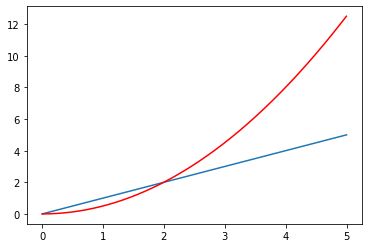

In [5]:
xs = np.linspace(-0,5,num=1000)

ys = xs

X,Y = integ(xs,ys)

plt.plot(xs,ys)   
plt.plot(X,Y,'r-')    


In [6]:
Y[-1]

12.500000000000002

In [216]:
_id = 3
accX = df[df.id == _id].accY.rolling(100,min_periods=1).mean()
accX = np.array(accX)

t = df[df.id == _id].millis_time.values - df[df.id == _id].millis_time.values[0]
t = t/1000
t = np.array(t)

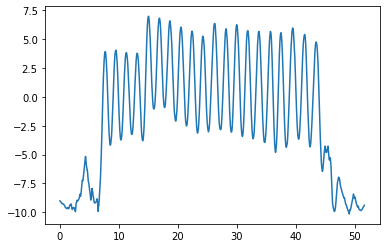

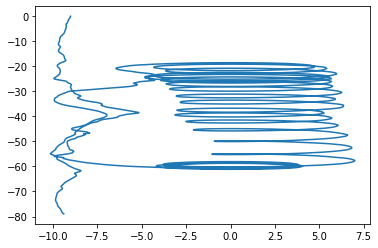

In [217]:
plt.figure()
plt.plot(t,accX)
plt.show()

plt.figure()
t_2,vx = integ(t,accX)
plt.plot(accX[1:], vx)
plt.show()

In [ ]:
x = np.linspace(-1000,1000,2001)
    INTER = interp1d(x_i, y_i, bounds_error=False)
    y = INTER(x)
    
    df_2[str(i)] = diff(y,x)

In [75]:
diff(x, diff(x,y))

array([1., 1., 1., ..., 1., 1., 1.])

In [75]:
diff(x, diff(x,y))

array([1., 1., 1., ..., 1., 1., 1.])

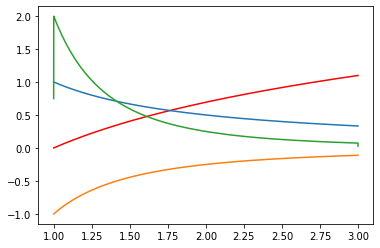

In [14]:
x = np.linspace(1,3,num=10000)
y = np.log(x)
plt.plot(x,y,'r-')
plt.plot(x,diff(x,y))
plt.plot(x,diff(x, diff(x,y)))
plt.plot(x,diff(x,diff(x, diff(x,y))))

In [50]:
x

array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
       2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ])

In [51]:
y

array([ 0.        ,  0.19753086,  0.79012346,  1.77777778,  3.16049383,
        4.9382716 ,  7.11111111,  9.67901235, 12.64197531, 16.        ])

In [52]:
diff(x,y)

array([2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25, 2.25])

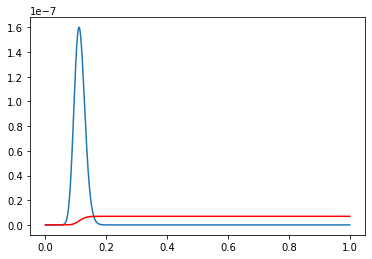

In [19]:
xs = np.linspace(0,1,num=10000)

ys = xs**36*(1-xs)**290*scipy.special.binom(9, 0)*scipy.special.binom(132, 19)*scipy.special.binom(97, 6)*scipy.special.binom(52, 11)

X,Y = integ(xs,ys)

plt.plot(xs,ys)   
plt.plot(X,Y,'r-')   

In [10]:
Y[-1]

2.829270645835542e-51